In [ ]:
pip install majka

In [ ]:
import majka
morph = majka.Majka("/content/sample_data/majka.w-lt")

morph.flags |= majka.ADD_DIACRITICS  # find word forms with diacritics
morph.flags |= majka.DISALLOW_LOWERCASE  # do not enable to find lowercase variants
morph.flags |= majka.IGNORE_CASE  # ignore the word case whatsoever
morph.flags = 0  # unset all flags

morph.tags = False  # return just the lemma, do not process the tags
morph.tags = True  # turn tag processing back on (default)

morph.compact_tag = True  # return tag in compact form (as returned by Majka)
morph.compact_tag = False  # do not return compact tag (default=False)

morph.first_only = True  # return only the first entry
morph.first_only = False  # return all entries (default)

print(morph.find("chci"))
print(morph.find("jsem"))
print(morph.find("z"))
print(morph.find("s"))

[{'lemma': 'chtít', 'tags': {'pos': 'verb', 'negation': False, 'aspect': 'imperfect', 'mode': 'present indicative', 'person': 1, 'singular': True}}]
[{'lemma': 'být', 'tags': {'pos': 'verb', 'negation': False, 'aspect': 'imperfect', 'mode': 'present indicative', 'person': 1, 'singular': True}}]
[{'lemma': 'z', 'tags': {'pos': 'interjection'}}, {'lemma': 'z', 'tags': {'pos': 'preposition', 'case': 2}}]
[{'lemma': 's', 'tags': {'pos': 'interjection'}}, {'lemma': 's', 'tags': {'pos': 'preposition', 'case': 7}}, {'lemma': 's', 'tags': {}}]


In [ ]:
ts = morph.find("z")
ts_2 = morph.find("s")

def check(result):
  if len(result) == 1:
    pos = []
    a = result[0]
    b = a["tags"]
    if "pos" in b.keys():
      c = b["pos"]
      pos.append(c)
      return pos
  else:
    pos = []
    for a in result:
      b = a["tags"]
      if "pos" in b.keys():
        c = b["pos"]
        pos.append(c)
    return pos

print(check(ts))
print(check(ts_2))

['interjection', 'preposition']
['interjection', 'preposition']


In [ ]:
print(check(morph.find("u")))

['preposition']


In [ ]:
#前置詞も一語にカウントする
text = "Pokud chce zákazník jít s dobou a kupovat ekologické oblečení, může sáhnout třeba po výrobcích z biobavlny nebo recyklovaného polyesteru."
words = text.split(" ")
print(words)

['Pokud', 'chce', 'zákazník', 'jít', 's', 'dobou', 'a', 'kupovat', 'ekologické', 'oblečení,', 'může', 'sáhnout', 'třeba', 'po', 'výrobcích', 'z', 'biobavlny', 'nebo', 'recyklovaného', 'polyesteru.']


In [ ]:
new = []

for word in words:
  result = morph.find(word)
  a = check(result)
  if "preposition" not in a:
    new.append(word)

print(new)
#前置詞は除く

['Pokud', 'chce', 'zákazník', 'jít', 'dobou', 'a', 'kupovat', 'ekologické', 'oblečení,', 'může', 'sáhnout', 'třeba', 'výrobcích', 'biobavlny', 'nebo', 'recyklovaného', 'polyesteru.']


In [ ]:

i= 0

text_1 = "Pokud chce zákazník jít s dobou a kupovat ekologické oblečení, může sáhnout třeba po výrobcích z biobavlny nebo recyklovaného polyesteru."
words_2 = text_1.split(" ")

while i < len(words_2):
  result = morph.find(words_2[i])
  a = check(result)
  if "preposition" in a:
    n = words_2[i] +  " " +  words_2[i+1]
    print(n)
    words_2[i] = n
    del words_2[i+1]
  i += 1

print(words_2)
#前置詞をそれに続く名詞とくっつける

s dobou
po výrobcích
z biobavlny
['Pokud', 'chce', 'zákazník', 'jít', 's dobou', 'a', 'kupovat', 'ekologické', 'oblečení,', 'může', 'sáhnout', 'třeba', 'po výrobcích', 'z biobavlny', 'nebo', 'recyklovaného', 'polyesteru.']


In [ ]:
pip install gensim

In [ ]:
f = open(r"/content/sample_data/czech_example_text.txt", "r", encoding="utf-8")
s = f.read()
f.close()


In [ ]:
import re
texts_0 = s.replace(r"\n", "")
texts_0 = texts_0.lower()
texts_0 =texts_0.replace("„", "")
texts_0 = texts_0.replace("“", "")
texts_0 =texts_0.replace("\n", "")
texts_0 =  re.sub(r"\(.+\)", "", texts_0) 
texts_0 = texts_0.replace(",", "")
texts_0 = texts_0.replace("’", "")
texts_0 = texts_0.split(".")
print(texts_0[:10])

['podpis čtyři - vědecká dedukcesherlock holmes si vzal z rohu krbové římsy svou lahvičku a z pěkného marokénového pouzdra vyňal injekční stříkačku', ' dlouhými nervózními bílými prsty nasadil tenkou jehlu a na levé ruce si vyhrnul rukáv košile', ' chvilku zamyšleně hleděl na šlachovité předloktí a zápěstí poseté a zjizvené nesčetnými vpichy injekční jehly', ' posléze vbodl ostrý hrot pod kůži stlačil malý píst a s hlubokým spokojeným povzdechem se zvrátil do křesla se sametovým potahem', 'řadu měsíců jsem byl třikrát denně svědkem této procedury ale přestože jsem si na ni zvykl nesmířil jsem se s ní', ' naopak den ode dne mě ta podívaná stále víc popuzovala a svědomí se ve mně každou noc bouřilo při pomyšlení že nemám odvahu proti tomu protestovat', ' znovu a znovu jsem si slavnostně sliboval že zbavím svou duši tohoto břemene jenomže v odměřeném a nonšalantním vystupování mého přítele bylo cosi co mě vždy znova přesvědčilo že je ten poslední člověk na světě který někomu dovolí aby om

In [ ]:
sentences = []


for sentence in texts_0:
  words_1 = sentence.split(" ")
  sentences.append(words_1)


print(sentences[:10])

sentences_cop = sentences

[['podpis', 'čtyři', '-', 'vědecká', 'dedukcesherlock', 'holmes', 'si', 'vzal', 'z', 'rohu', 'krbové', 'římsy', 'svou', 'lahvičku', 'a', 'z', 'pěkného', 'marokénového', 'pouzdra', 'vyňal', 'injekční', 'stříkačku'], ['', 'dlouhými', 'nervózními', 'bílými', 'prsty', 'nasadil', 'tenkou', 'jehlu', 'a', 'na', 'levé', 'ruce', 'si', 'vyhrnul', 'rukáv', 'košile'], ['', 'chvilku', 'zamyšleně', 'hleděl', 'na', 'šlachovité', 'předloktí', 'a', 'zápěstí', 'poseté', 'a', 'zjizvené', 'nesčetnými', 'vpichy', 'injekční', 'jehly'], ['', 'posléze', 'vbodl', 'ostrý', 'hrot', 'pod', 'kůži', 'stlačil', 'malý', 'píst', 'a', 's', 'hlubokým', 'spokojeným', 'povzdechem', 'se', 'zvrátil', 'do', 'křesla', 'se', 'sametovým', 'potahem'], ['řadu', 'měsíců', 'jsem', 'byl', 'třikrát', 'denně', 'svědkem', 'této', 'procedury', 'ale', 'přestože', 'jsem', 'si', 'na', 'ni', 'zvykl', 'nesmířil', 'jsem', 'se', 's', 'ní'], ['', 'naopak', 'den', 'ode', 'dne', 'mě', 'ta', 'podívaná', 'stále', 'víc', 'popuzovala', 'a', 'svědomí'

In [ ]:
  i_for_sent = 0
  data_new = []
  while i_for_sent < len(sentences):
    words = sentences[i_for_sent]
    i_for_word = 0
    while i_for_word < len(words)-1:
      result = morph.find(words[i_for_word])
      a = check(result)
      if (a != None) and ("preposition" in a):
        #print("now", i_for_word+1, "th word in ", i_for_sent+1, "th sentence")
        n = words[i_for_word] + " " + words[i_for_word + 1]
        words[i_for_word] = n
        del words[i_for_word+1] 
      i_for_word += 1
    data_new.append(words)
    i_for_sent += 1
  

In [ ]:
for i in range(4):
  print(sentences_cop[i])
  print(data_new[i])
  print("\n")

['podpis', 'čtyři', '-', 'vědecká', 'dedukcesherlock', 'holmes', 'si', 'vzal', 'z rohu', 'krbové', 'římsy', 'svou', 'lahvičku', 'a', 'z pěkného', 'marokénového', 'pouzdra', 'vyňal', 'injekční', 'stříkačku']
['podpis', 'čtyři', '-', 'vědecká', 'dedukcesherlock', 'holmes', 'si', 'vzal', 'z rohu', 'krbové', 'římsy', 'svou', 'lahvičku', 'a', 'z pěkného', 'marokénového', 'pouzdra', 'vyňal', 'injekční', 'stříkačku']


['', 'dlouhými', 'nervózními', 'bílými', 'prsty', 'nasadil', 'tenkou', 'jehlu', 'a', 'na levé', 'ruce', 'si', 'vyhrnul', 'rukáv', 'košile']
['', 'dlouhými', 'nervózními', 'bílými', 'prsty', 'nasadil', 'tenkou', 'jehlu', 'a', 'na levé', 'ruce', 'si', 'vyhrnul', 'rukáv', 'košile']


['', 'chvilku', 'zamyšleně', 'hleděl', 'na šlachovité', 'předloktí', 'a', 'zápěstí', 'poseté', 'a', 'zjizvené', 'nesčetnými', 'vpichy', 'injekční', 'jehly']
['', 'chvilku', 'zamyšleně', 'hleděl', 'na šlachovité', 'předloktí', 'a', 'zápěstí', 'poseté', 'a', 'zjizvené', 'nesčetnými', 'vpichy', 'injekční

In [ ]:
print(data_new[0])
print(data_new[1])

['podpis čtyři - vědecká', 'dedukcesherlock holmes si vzal', 'z', 'rohu krbové římsy svou', 'lahvičku a z', 'pěkného marokénového pouzdra vyňal', 'injekční stříkačku']
[' dlouhými nervózními bílými', 'prsty nasadil tenkou jehlu', 'a na levé ruce', 'si vyhrnul rukáv košile']


In [ ]:
aaaaaa = [1, 3, ,5]
print(a[1])

In [ ]:
def make_words(sentences):
  train = []
  counter_0 = 0
  counter_1 = 0
  while counter_0 < len(sentences):
    
    sentence = sentences[i]
    words = sentence.split(" ")
    counter_0 += 1
    while counter_1 < len(words):
      result = morph.find(words[i])
      pos = check(reuslt)
      if (pos != None) and ("preposition" in pos):
        print(words[i], "in {}th sentence".format(counter_0))
        n = words[i] + " " + words[i+1]
        words[i] =n
        del words[i+1]
      counter_1 += 1
    train.append(words)
  #return train

In [ ]:
print(new_sentences_test[:3])
ttss = new_sentences_test[:100]

['\n\n\n\n\npodpis čtyř\n\n\n\n\n\ni - vědecká dedukce\n\nsherlock holmes si vzal z rohu krbové římsy svou lahvičku a z pěkného marokénového pouzdra vyňal injekční stříkačku', ' dlouhými nervózními bílými prsty nasadil tenkou jehlu a na levé ruce si vyhrnul rukáv košile', ' chvilku zamyšleně hleděl na šlachovité předloktí a zápěstí poseté a zjizvené nesčetnými vpichy injekční jehly']


In [ ]:
make_words(new_sentences_test)

IndexError: ignored

In [ ]:
train = []
for sentence in ttss:
  words_2 = sentence.split(" ")
  while i < len(words_2):
    result = morph.find(words_2[i])
    a = check(result)
    if "preposition" in a:
      n = words_2[i] +  " " +  words_2[i+1]
      print(n)
      words_2[i] = n
      del words_2[i+1]
    i += 1
  train.append(words_2)

print(train)


[['\n\n\n\n\npodpis', 'čtyř\n\n\n\n\n\ni', '-', 'vědecká', 'dedukce\n\nsherlock', 'holmes', 'si', 'vzal', 'z', 'rohu', 'krbové', 'římsy', 'svou', 'lahvičku', 'a', 'z', 'pěkného', 'marokénového', 'pouzdra', 'vyňal', 'injekční', 'stříkačku'], ['', 'dlouhými', 'nervózními', 'bílými', 'prsty', 'nasadil', 'tenkou', 'jehlu', 'a', 'na', 'levé', 'ruce', 'si', 'vyhrnul', 'rukáv', 'košile'], ['', 'chvilku', 'zamyšleně', 'hleděl', 'na', 'šlachovité', 'předloktí', 'a', 'zápěstí', 'poseté', 'a', 'zjizvené', 'nesčetnými', 'vpichy', 'injekční', 'jehly'], ['', 'posléze', 'vbodl', 'ostrý', 'hrot', 'pod', 'kůži', 'stlačil', 'malý', 'píst', 'a', 's', 'hlubokým', 'spokojeným', 'povzdechem', 'se', 'zvrátil', 'do', 'křesla', 'se', 'sametovým', 'potahem'], ['\n\nřadu', 'měsíců', 'jsem', 'byl', 'třikrát', 'denně', 'svědkem', 'této', 'procedury', 'ale', 'přestože', 'jsem', 'si', 'na', 'ni', 'zvykl', 'nesmířil', 'jsem', 'se', 's', 'ní'], ['', 'naopak', 'den', 'ode', 'dne', 'mě', 'ta', 'podívaná', 'stále', 'víc'

In [ ]:
train = []
counter_0 = 0
counter_1 = 0

while counter_0 < len(texts_0):
  sentence = texts_0[counter_0]
  words = sentence.split(" ")
  counter_0 += 1
  while counter_1 < len(words):
    result = morph.find(words[counter_1])
    pos = check(result)
    if (pos != None) and ("preposition" in pos):
      print(words[counter_1], "in {}th sentence".format(counter_0))
      n = words[counter_1] + " " + words[counter_1 + 1]
      words[counter_1] =n
      del words[counter_1]
    counter_1 += 1
  train.append(words)

z in 1th sentence
z in 1th sentence
proti in 6th sentence
na in 7th sentence
v in 110th sentence
před in 329th sentence
o in 329th sentence
se in 329th sentence
se in 1052th sentence
s in 2123th sentence
k in 2123th sentence


In [ ]:
print(train)
print(len(train))
print(len(texts_0))

[['\n\n\n\n\npodpis', 'čtyř\n\n\n\n\n\ni', '-', 'vědecká', 'dedukce\n\nsherlock', 'holmes', 'si', 'vzal', 'rohu', 'krbové', 'římsy', 'svou', 'lahvičku', 'a', 'pěkného', 'marokénového', 'pouzdra', 'vyňal', 'injekční', 'stříkačku'], ['', 'dlouhými', 'nervózními', 'bílými', 'prsty', 'nasadil', 'tenkou', 'jehlu', 'a', 'na', 'levé', 'ruce', 'si', 'vyhrnul', 'rukáv', 'košile'], ['', 'chvilku', 'zamyšleně', 'hleděl', 'na', 'šlachovité', 'předloktí', 'a', 'zápěstí', 'poseté', 'a', 'zjizvené', 'nesčetnými', 'vpichy', 'injekční', 'jehly'], ['', 'posléze', 'vbodl', 'ostrý', 'hrot', 'pod', 'kůži', 'stlačil', 'malý', 'píst', 'a', 's', 'hlubokým', 'spokojeným', 'povzdechem', 'se', 'zvrátil', 'do', 'křesla', 'se', 'sametovým', 'potahem'], ['\n\nřadu', 'měsíců', 'jsem', 'byl', 'třikrát', 'denně', 'svědkem', 'této', 'procedury', 'ale', 'přestože', 'jsem', 'si', 'na', 'ni', 'zvykl', 'nesmířil', 'jsem', 'se', 's', 'ní'], ['', 'naopak', 'den', 'ode', 'dne', 'mě', 'ta', 'podívaná', 'stále', 'víc', 'popuzov

In [ ]:
from gensim.models import word2vec

model = word2vec.Word2Vec(data_new, size=100, window=5, min_count=1)
model.wv.save_word2vec_format(r"/content/sample_data/sample_word2vec_czech.csv")

In [ ]:
word_vectors = model.wv
word_vectors.save("/content/sample_data/word2vec_czech_2.wordvectors")

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
words=list(model.wv.vocab)
print(words)

['podpis', 'čtyři', '-', 'vědecká', 'dedukcesherlock', 'holmes', 'si', 'vzal', 'z rohu', 'krbové', 'římsy', 'svou', 'lahvičku', 'a', 'z pěkného', 'marokénového', 'pouzdra', 'vyňal', 'injekční', 'stříkačku', '', 'dlouhými', 'nervózními', 'bílými', 'prsty', 'nasadil', 'tenkou', 'jehlu', 'na levé', 'ruce', 'vyhrnul', 'rukáv', 'košile', 'chvilku', 'zamyšleně', 'hleděl', 'na šlachovité', 'předloktí', 'zápěstí', 'poseté', 'zjizvené', 'nesčetnými', 'vpichy', 'jehly', 'posléze', 'vbodl', 'ostrý', 'hrot', 'pod kůži', 'stlačil', 'malý', 'píst', 's hlubokým', 'spokojeným', 'povzdechem', 'se zvrátil', 'do křesla', 'se sametovým', 'potahem', 'řadu', 'měsíců', 'jsem', 'byl', 'třikrát', 'denně', 'svědkem', 'této', 'procedury', 'ale', 'přestože', 'na ni', 'zvykl', 'nesmířil', 'se s', 'ní', 'naopak', 'den', 'ode dne', 'mě', 'ta', 'podívaná', 'stále', 'víc', 'popuzovala', 'svědomí', 'se ve', 'mně', 'každou', 'noc', 'bouřilo', 'při', 'pomyšlení', 'že', 'nemám', 'odvahu', 'proti tomu', 'protestovat', 'zno

In [ ]:
X=model[model.wv.vocab]

[[ 9.2466909e-04 -1.0619285e-03  1.5843501e-03 ... -1.1861600e-03
  -5.1887240e-03 -1.4638626e-03]
 [ 1.2448290e-03 -1.0410300e-03  6.9042668e-04 ... -3.4728388e-03
   2.3550498e-03  4.7838022e-03]
 [-1.0623243e-02 -6.7915802e-04 -5.7003717e-03 ... -2.6902165e-02
  -1.8560521e-02  1.0716641e-02]
 ...
 [-1.3526778e-03 -4.1888668e-03 -4.4072634e-03 ... -1.3877229e-03
   2.5517826e-03 -3.0335367e-03]
 [-1.6616046e-04  2.4983269e-04 -3.5585670e-03 ...  2.2501590e-04
  -2.8880164e-03 -2.5523577e-05]
 [ 4.9293670e-03  1.2598108e-03  1.5846443e-03 ...  4.1609704e-03
  -3.9492785e-03  1.8597901e-03]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(X)

In [ ]:
new_df = pd.DataFrame(data_tsne, index=words, columns=["x", "y"])

In [ ]:
import random

for i in range(10):
    a = random.randint(1, 1000)
    print(words[a])

nevlastním
s tímhle
znalosti
poučí
vřelém
umí
z čeho
i
vyžaduje
nevyrovnatelným


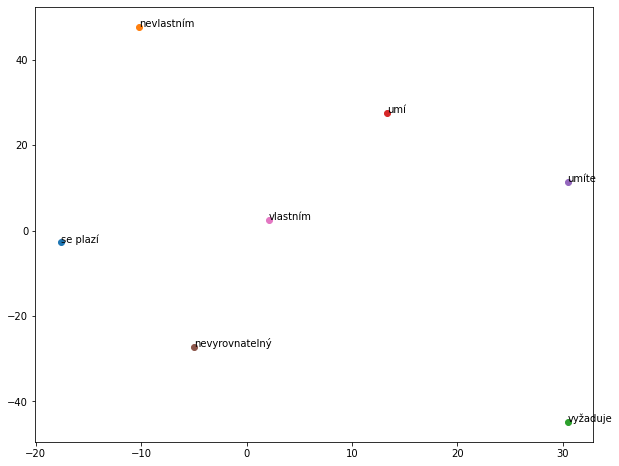

In [ ]:
a = ["se plazí", "nevlastním", "vyžaduje", "umí", "umíte", "nevyrovnatelný", "vlastním"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

for b in a:
  ax.scatter(new_df["x"][b], new_df["y"][b])

for b in a:
    ax.annotate(b, (new_df["x"][b], new_df["y"][b]))

plt.show()

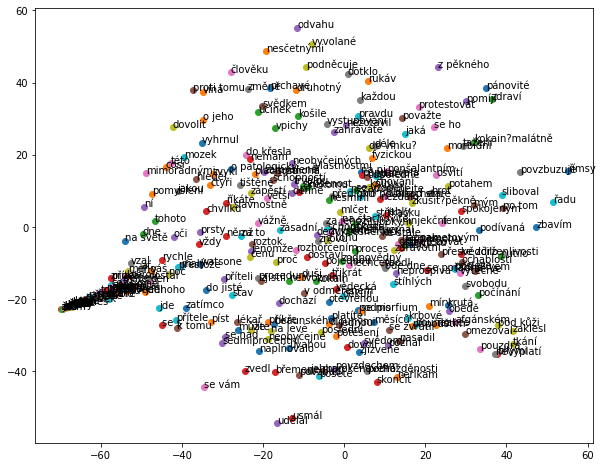

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

for b in words[:300]:
  ax.scatter(new_df["x"][b], new_df["y"][b])

for b in words[:300]:
    ax.annotate(b, (new_df["x"][b], new_df["y"][b]))

plt.show()